# Time Series Forecasting - AR(1)

In [1]:
!pip install statsmodels --upgrade

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

Import Data

In [3]:
# import csv dataset
df=pd.read_csv('divvy-tripdata_cleaned.csv',index_col=1,parse_dates=True)

# make into dataframe
df2=pd.DataFrame(df)

# which columns to include alongside column acting as index
cols=[3]
df2=df2[df2.columns[cols]]
X=df2.values

# printing stuffs
print('Shape of data \t',df2.shape)
print('Original Dataset:\n',df2.head())
print('After extracting only trip duration:\n',X)

Shape of data 	 (76000, 1)
Original Dataset:
                      trip_duration
start_time                        
2013-08-16 17:40:00           2729
2014-07-14 17:17:00            277
2014-06-19 18:04:00            566
2014-07-09 19:46:00            637
2014-06-27 16:19:00            161
After extracting only trip duration:
 [[2729]
 [ 277]
 [ 566]
 ...
 [1409]
 [ 809]
 [1885]]


In [4]:
# how the data looks like
df2

,trip_duration
start_time,
2013-08-16 17:40:00,2729
2014-07-14 17:17:00,277
2014-06-19 18:04:00,566
2014-07-09 19:46:00,637
2014-06-27 16:19:00,161
...,...
2013-08-01 19:52:00,958
2014-07-07 22:41:00,844
2013-11-23 09:05:00,1409


<AxesSubplot:xlabel='start_time'>

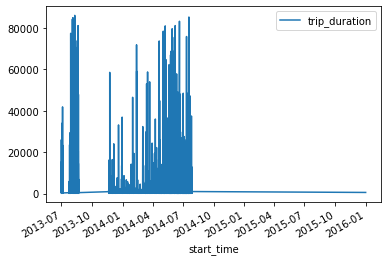

In [5]:
# plot a graph
df2.plot()

In [6]:
# performing "Augmented Dickey Fuller" test to check for stationarity of data

from statsmodels.tsa.stattools import adfuller

dftest=adfuller(df2['trip_duration'],autolag='AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ",dftest[1])
print("3. No. of Lags : ",dftest[2])
print("4. No. of Observations used for ADF Regression and Critical Value Calculation : ",dftest[3])
print("5. Critical Values :")
for key,val in dftest[4].items():
    print("\t",key, ": ",val)

1. ADF :  -275.94903092250775
2. P-Value :  0.0
3. No. of Lags :  0
4. No. of Observations used for ADF Regression and Critical Value Calculation :  75999
5. Critical Values :
	 1% :  -3.4304360474596383
	 5% :  -2.8615780314967068
	 10% :  -2.566790242857946


Inference: As the P-Value is less than 0.05 (statistically significant), which means the null hypothesis should be rejected. The data is stationary.

In [10]:
# from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
# pacf=plot_pacf(df2['trip_duration'],lags=2)
# acf=plot_acf(df2['trip_duration'],lags=2)

Split Dataset into Train and Test: Testing : Last 7 days

In [8]:
# splitting the dataset into training and testing sets
train=X[:len(X)-7]
test=X[len(X)-7:]

In [9]:
# creating the model after training on the training data
model=AutoReg(train,lags=10).fit()

In [10]:
# printing the model summary
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                75993
Model:                    AutoReg(10)   Log Likelihood             -695864.992
Method:               Conditional MLE   S.D. of innovations           2296.699
Date:                Mon, 05 Dec 2022   AIC                        1391753.983
Time:                        12:19:39   BIC                        1391864.843
Sample:                            10   HQIC                       1391788.047
                                75993                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1145.1613     15.513     73.821      0.000    1114.757    1175.566
y.L1          -0.0010      0.004     -0.266      0.790      -0.008       0.006
y.L2          -0.0028      0.004     -0.773      0.4

In [11]:
print(len(train))

75993


Make Predictions on Test Set and Compare

In [12]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)

[1140.88097595 1142.15828814 1138.04795025 1131.48955233 1138.94974506
 1132.76496985 1136.22582997]


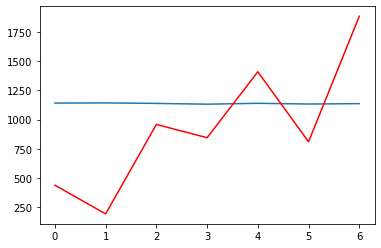

In [13]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)

Calculate Error

In [14]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))

In [15]:
print(rmse)

567.4040734634955


Making Future Predictions

In [16]:
pred_future=model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print("The future prediction for the next timeframe")
print(pred_future)
print('Number of Predictions Made: \t',len(pred_future))

The future prediction for the next timeframe
[1135.34267101 1136.5921055  1136.21029705 1136.2633281  1136.25222976
 1136.22392778 1136.25229371]
Number of Predictions Made: 	 7
